Consider the dataset Assignment02_GolfPlayers_Earnings.xlsx.
File location: https://drive.google.com/drive/folders/1Jl8iDu7nGmrqCECbrLqmVafgwE5PYfiU

The file contains game performance and annual earning of 200 top players.<br>
A) Train a regression tree (CART) using the given data to predict the earning of players. Use a 80/20 split for train/test.
   1) What is the train and test rmse value?<br>
   2) Which features come out to be important?<br>
   
B) Train a multiple regression model and compare the test rmse value? Use the exact same split as in case A
  1) Does the data exhibit multicollinearity?
  
C) Train a cubist model using the cubist package. What is the test rmse value? Use the exact same split as in case A

Which model give the best performance on test data? Why do you think that is the case?

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from sklearn.linear_model import LinearRegression
from cubist import Cubist
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics


import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [2]:
# Load data
earnings = pd.read_excel('C:/Users/Karthik.Iyer/Downloads/AccelerateAI/Tree-Based-Models-main/Assignments/Assignment02_GolfPlayer_Earnings.xlsx', sheet_name='2011')
earnings.sample(5)

,Rank,Player,Age,Events,Rounds,Cuts Made,Top 10s,Wins,Earnings,Yards/Drive,Driving Accuracy,Greens in Regulation,Putting Average,Sand Save Pct,Eagles,Birdies,Pars,Bogies
103,104.0,Chris Couch,38.0,21.0,73.0,16.0,3.0,0.0,922495.75,296.8,65.0,65.0,1.749,47.0,10.0,278.0,833.0,177.0
121,122.0,Bud Cauley,21.0,8.0,30.0,7.0,2.0,0.0,735149.56,292.2,62.9,72.8,NaN,58.6,2.0,112.0,355.0,55.0
110,111.0,Tom Gillis,43.0,19.0,55.0,9.0,2.0,0.0,814147.00,290.1,64.1,66.4,1.830,57.1,3.0,176.0,646.0,147.0
178,179.0,Ben Martin,24.0,25.0,74.0,12.0,1.0,0.0,340080.16,289.5,63.4,61.3,1.773,38.7,8.0,267.0,810.0,227.0
45,46.0,Chris Kirk,26.0,28.0,88.0,15.0,4.0,1.0,1877626.80,295.7,56.5,65.9,1.751,53.4,7.0,330.0,996.0,239.0


In [3]:
# Check info
earnings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  200 non-null    float64
 1   Player                200 non-null    object 
 2   Age                   188 non-null    float64
 3   Events                200 non-null    float64
 4   Rounds                200 non-null    float64
 5   Cuts Made             200 non-null    float64
 6   Top 10s               200 non-null    float64
 7   Wins                  200 non-null    float64
 8   Earnings              200 non-null    float64
 9   Yards/Drive           197 non-null    float64
 10  Driving Accuracy      197 non-null    float64
 11  Greens in Regulation  197 non-null    float64
 12  Putting Average       169 non-null    float64
 13  Sand Save Pct         197 non-null    float64
 14  Eagles                195 non-null    float64
 15  Birdies               1

In [4]:
# Percentage of missing values
(earnings.isnull().sum()/earnings.shape[0])*100

Rank                     0.0
Player                   0.0
Age                      6.0
Events                   0.0
Rounds                   0.0
Cuts Made                0.0
Top 10s                  0.0
Wins                     0.0
Earnings                 0.0
Yards/Drive              1.5
Driving Accuracy         1.5
Greens in Regulation     1.5
Putting Average         15.5
Sand Save Pct            1.5
Eagles                   2.5
Birdies                  2.5
Pars                     2.5
Bogies                   2.5
dtype: float64

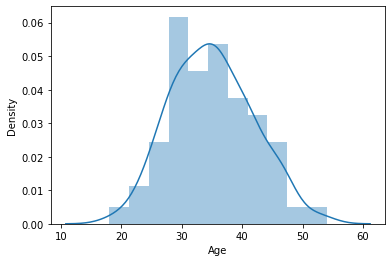

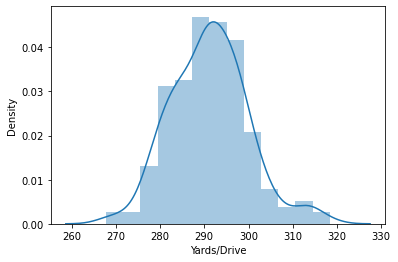

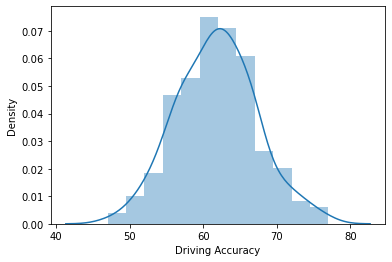

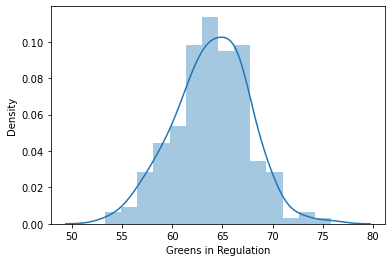

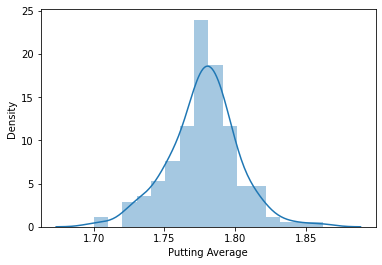

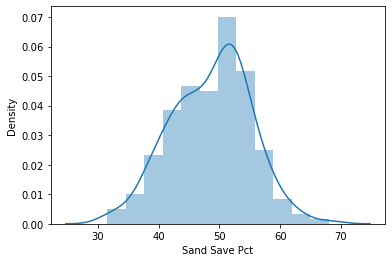

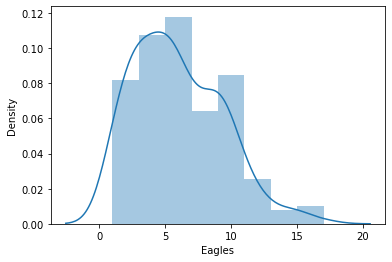

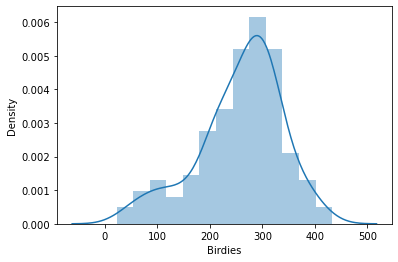

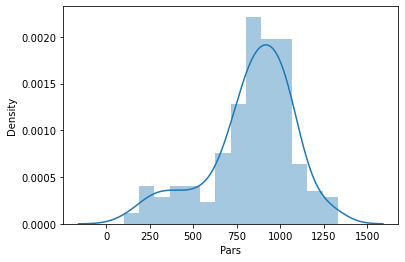

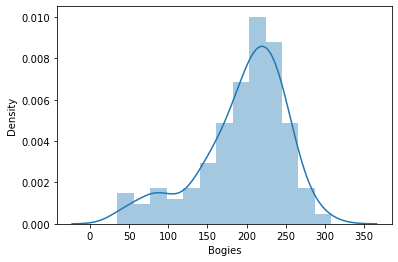

In [5]:
# Check distribution for variables which has missing values
x_vars = ['Age', 'Yards/Drive', 'Driving Accuracy', 'Greens in Regulation', 
         'Putting Average', 'Sand Save Pct', 'Eagles', 'Birdies', 'Pars', 'Bogies']

for var in x_vars:
    sns.distplot(x=earnings[var], axlabel=var)
    plt.show()

The distribution do not show much skewness for the features analysed above, and we can use MEAN as the imputation technique to impute missing values.

In [6]:
# Impute with MEAN
x_vars = ['Age', 'Yards/Drive', 'Driving Accuracy', 'Greens in Regulation', 
         'Putting Average', 'Sand Save Pct', 'Eagles', 'Birdies', 'Pars', 'Bogies']

for var in x_vars:
    earnings[var].fillna(round(earnings[var].mean()), inplace=True)

In [7]:
# Check missing values again
earnings.isnull().sum()

Rank                    0
Player                  0
Age                     0
Events                  0
Rounds                  0
Cuts Made               0
Top 10s                 0
Wins                    0
Earnings                0
Yards/Drive             0
Driving Accuracy        0
Greens in Regulation    0
Putting Average         0
Sand Save Pct           0
Eagles                  0
Birdies                 0
Pars                    0
Bogies                  0
dtype: int64

In [8]:
# Drop Rank and Player
earnings.drop(['Rank', 'Player'], axis=1, inplace=True)

In [9]:
# Split the data
X = earnings.drop('Earnings', axis=1)
y = earnings['Earnings']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [10]:
# Check shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(160, 15)
(160,)
(40, 15)
(40,)


**A) Train a regression tree (CART) using the given data to predict the earning of players. Use a 80/20 split for train/test.**<br>
   **1) What is the train and test rmse value?**<br>
   **2) Which features come out to be important?**

In [11]:
# Train Regression Tree
clf_tree = DecisionTreeRegressor(random_state=42)

# Fit the model
clf_tree = clf_tree.fit(X_train, y_train)

In [12]:
# Tree depth
clf_tree.get_depth()

17

In [13]:
# Cross validation
params = {'max_depth' : range(1,11), 'min_samples_split' : range(10, 60, 10)}

# GridSearch
clf_tree_gs = GridSearchCV(estimator=clf_tree, cv=5, param_grid=params, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the model
clf_tree_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'min_samples_split': range(10, 60, 10)},
             scoring='neg_mean_squared_error')

In [14]:
# Print best params and score
print(clf_tree_gs.best_params_)
print(-clf_tree_gs.best_score_)

{'max_depth': 6, 'min_samples_split': 20}
352324577067.28143


In [15]:
# Lets train the model using the above parameters
clf_new = DecisionTreeRegressor(max_depth=6, min_samples_split=20, random_state=42)

clf_new = clf_new.fit(X_train, y_train)

In [16]:
# Predict on train data
y_train_pred = clf_new.predict(X_train)

# RMSE
print('RMSE for Train set:', np.round(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)), 2))

RMSE for Train set: 366791.76


In [17]:
# Predict on test data
y_pred = clf_new.predict(X_test)

# RMSE
print('RMSE for Test set:', np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 2))

RMSE for Test set: 438813.7


In [18]:
# Check r2 score
print('Train r2 score:', np.round(clf_new.score(X_train, y_train)*100, 2))
print('Test r2 score:', np.round(clf_new.score(X_test, y_test)*100, 2))

Train r2 score: 90.74
Test r2 score: 75.98


The model is not generalizing so well. May be few more hyperparameters can be checked to see if the score can be improved further.

In [19]:
# feature importance
feature_imp = pd.Series(clf_new.feature_importances_, index=X.columns)
feature_imp.sort_values(ascending=False)

Top 10s                 0.790070
Wins                    0.155612
Events                  0.039444
Cuts Made               0.007146
Birdies                 0.004268
Greens in Regulation    0.003461
Age                     0.000000
Rounds                  0.000000
Yards/Drive             0.000000
Driving Accuracy        0.000000
Putting Average         0.000000
Sand Save Pct           0.000000
Eagles                  0.000000
Pars                    0.000000
Bogies                  0.000000
dtype: float64

Most important variable is Top 10s (how many times the player made in the Top 10), followed by Wins (No. of Wins)

RMSE for Train set: 366791.76<br>
RMSE for Test set: 438813.7

Train r2 score: 90.74<br>
Test r2 score: 75.98

Most important variable is Top 10s (how many times the player made in the Top 10), followed by Wins (No. of Wins)

**B) Train a multiple regression model and compare the test rmse value? Use the exact same split as in case A**<br>
  **1) Does the data exhibit multicollinearity?**

In [20]:
# Lets check correlation
X.corr()

,Age,Events,Rounds,Cuts Made,Top 10s,Wins,Yards/Drive,Driving Accuracy,Greens in Regulation,Putting Average,Sand Save Pct,Eagles,Birdies,Pars,Bogies
Age,1.000000,-0.092227,-0.115329,-0.170545,-0.197392,-0.168706,-0.386911,0.287301,-0.027842,0.056555,0.212182,-0.268317,-0.149442,-0.079152,-0.130272
Events,-0.092227,1.000000,0.965305,0.747863,0.159832,0.037784,-0.007134,0.047053,-0.111358,-0.785837,-0.140376,0.421469,0.819189,0.878542,0.880135
Rounds,-0.115329,0.965305,1.000000,0.884361,0.294934,0.118294,0.039943,0.067654,-0.002864,-0.798943,-0.089560,0.453509,0.893354,0.915519,0.872256
Cuts Made,-0.170545,0.747863,0.884361,1.000000,0.519820,0.253015,0.137341,0.044104,0.208827,-0.710429,0.024753,0.426087,0.858880,0.808854,0.705064
Top 10s,-0.197392,0.159832,0.294934,0.519820,1.000000,0.497161,0.187754,-0.022554,0.331647,-0.359023,0.218980,0.286383,0.411298,0.257326,0.119865
Wins,-0.168706,0.037784,0.118294,0.253015,0.497161,1.000000,0.206130,-0.099866,0.218636,-0.211933,-0.005464,0.205560,0.190133,0.080549,0.023282
Yards/Drive,-0.386911,-0.007134,0.039943,0.137341,0.187754,0.206130,1.000000,-0.665529,0.089791,-0.028782,-0.357841,0.353387,0.032861,-0.112303,-0.001470
Driving Accuracy,0.287301,0.047053,0.067654,0.044104,-0.022554,-0.099866,-0.665529,1.000000,0.240947,-0.004974,0.155563,-0.127717,0.122039,0.202777,0.056360
Greens in Regulation,-0.027842,-0.111358,-0.002864,0.208827,0.331647,0.218636,0.089791,0.240947,1.000000,0.132795,0.050154,0.068847,0.136307,0.075310,-0.064012
Putting Average,0.056555,-0.785837,-0.798943,-0.710429,-0.359023,-0.211933,-0.028782,-0.004974,0.132795,1.000000,0.001922,-0.397233,-0.726926,-0.704747,-0.676123


In [21]:
# Check correlation with y
X.corrwith(y).sort_values(ascending=False)

Top 10s                 0.892553
Wins                    0.734709
Cuts Made               0.532624
Greens in Regulation    0.398025
Birdies                 0.396741
Rounds                  0.282454
Eagles                  0.280651
Yards/Drive             0.237292
Pars                    0.235980
Sand Save Pct           0.159654
Events                  0.138847
Bogies                  0.117265
Driving Accuracy       -0.056622
Age                    -0.205111
Putting Average        -0.350459
dtype: float64

In [22]:
# Lets check multi-collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])], index=X.columns).sort_values(ascending=False)

Rounds                  1737.821232
Putting Average         1413.377397
Yards/Drive             1316.028721
Events                   924.301176
Greens in Regulation     535.083802
Pars                     373.313214
Birdies                  334.177603
Bogies                   243.868996
Cuts Made                221.672907
Driving Accuracy         206.288065
Sand Save Pct             76.620031
Age                       36.424450
Eagles                     7.197702
Top 10s                    6.038684
Wins                       1.706772
dtype: float64

In [23]:
# Lets remove Driving Accuracy due to low correlation with y
X.drop('Driving Accuracy', axis=1, inplace=True)
pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])], index=X.columns).sort_values(ascending=False)

Rounds                  1727.157467
Putting Average         1218.951762
Yards/Drive             1211.611280
Events                   923.956563
Greens in Regulation     490.244722
Pars                     366.668122
Birdies                  333.635066
Bogies                   239.703394
Cuts Made                218.508113
Sand Save Pct             76.423362
Age                       34.401947
Eagles                     7.194917
Top 10s                    6.036686
Wins                       1.706308
dtype: float64

In [24]:
# Lets remove Bogies
X.drop('Bogies', axis=1, inplace=True)
pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])], index=X.columns).sort_values(ascending=False)

Rounds                  1547.546150
Yards/Drive             1199.479475
Putting Average         1188.831534
Events                   771.108914
Greens in Regulation     449.491401
Pars                     339.534271
Birdies                  250.900621
Cuts Made                213.283381
Sand Save Pct             70.871431
Age                       34.401747
Eagles                     6.984782
Top 10s                    5.387706
Wins                       1.703554
dtype: float64

In [25]:
# Lets remove Events
X.drop('Events', axis=1, inplace=True)
pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])], index=X.columns).sort_values(ascending=False)

Putting Average         1140.994407
Yards/Drive             1126.491183
Greens in Regulation     447.418289
Pars                     329.617071
Birdies                  237.227317
Rounds                   176.731834
Cuts Made                 76.026312
Sand Save Pct             70.667321
Age                       34.037522
Eagles                     6.955996
Top 10s                    5.374728
Wins                       1.697018
dtype: float64

In [26]:
# Lets remove Sand Save Pct
X.drop('Sand Save Pct', axis=1, inplace=True)
pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])], index=X.columns).sort_values(ascending=False)

Yards/Drive             1125.587685
Putting Average         1099.331088
Greens in Regulation     444.878880
Pars                     318.628796
Birdies                  235.920890
Rounds                   171.120633
Cuts Made                 74.958456
Age                       31.579300
Eagles                     6.843142
Top 10s                    4.908280
Wins                       1.688390
dtype: float64

In [27]:
# Lets remove Age
X.drop('Age', axis=1, inplace=True)
pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])], index=X.columns).sort_values(ascending=False)

Yards/Drive             1124.309431
Putting Average         1085.915717
Greens in Regulation     436.351383
Pars                     317.036072
Birdies                  234.861408
Rounds                   169.724013
Cuts Made                 74.173237
Eagles                     6.626679
Top 10s                    4.907709
Wins                       1.685244
dtype: float64

In [28]:
# Lets remove Pars
X.drop('Pars', axis=1, inplace=True)
pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])], index=X.columns).sort_values(ascending=False)

Putting Average         925.366088
Yards/Drive             858.907550
Greens in Regulation    426.049735
Rounds                  104.394902
Birdies                  75.449175
Cuts Made                69.922753
Eagles                    6.614332
Top 10s                   4.645579
Wins                      1.678058
dtype: float64

In [29]:
# Lets remove Yards/Drive
X.drop('Yards/Drive', axis=1, inplace=True)
pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])], index=X.columns).sort_values(ascending=False)

Greens in Regulation    422.103550
Putting Average         338.037678
Rounds                   92.581547
Birdies                  73.111881
Cuts Made                69.838583
Eagles                    5.909910
Top 10s                   4.579966
Wins                      1.644592
dtype: float64

In [30]:
# Lets remove Eagles
X.drop('Eagles', axis=1, inplace=True)
pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])], index=X.columns).sort_values(ascending=False)

Greens in Regulation    422.085237
Putting Average         337.980036
Rounds                   92.274576
Cuts Made                69.116192
Birdies                  68.252399
Top 10s                   4.549205
Wins                      1.627925
dtype: float64

In [31]:
# Lets remove Rounds
X.drop('Rounds', axis=1, inplace=True)
pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])], index=X.columns).sort_values(ascending=False)

Greens in Regulation    414.237300
Putting Average         330.167856
Birdies                  43.236668
Cuts Made                41.456622
Top 10s                   3.959217
Wins                      1.624544
dtype: float64

In [32]:
# Lets remove Putting Average
X.drop('Putting Average', axis=1, inplace=True)
pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])], index=X.columns).sort_values(ascending=False)

Birdies                 43.131022
Cuts Made               39.785112
Greens in Regulation    11.706315
Top 10s                  3.752501
Wins                     1.603965
dtype: float64

In [33]:
# Lets remove Birdies
X.drop('Birdies', axis=1, inplace=True)
pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])], index=X.columns).sort_values(ascending=False)

Cuts Made               12.350001
Greens in Regulation     9.576521
Top 10s                  3.726886
Wins                     1.602767
dtype: float64

In [34]:
# Lets remove Greens in Regulation
X.drop('Greens in Regulation', axis=1, inplace=True)
pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])], index=X.columns).sort_values(ascending=False)

Top 10s      3.702734
Cuts Made    2.968481
Wins         1.602341
dtype: float64

**VIFs are below 5 and lets train the model using these variables**

In [35]:
# Train Regression model
reg = LinearRegression()
reg = reg.fit(X_train[['Top 10s', 'Cuts Made', 'Wins']], y_train)

In [36]:
# RMSE on Train
y_train_pred = reg.predict(X_train[['Top 10s', 'Cuts Made', 'Wins']])

print('Train RMSE:', np.round(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)), 2))

Train RMSE: 322586.32


In [37]:
# RMSE on Test
y_pred = reg.predict(X_test[['Top 10s', 'Cuts Made', 'Wins']])

print('Test RMSE:', np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 2))

Test RMSE: 382073.18


In [38]:
# Check r2 score
print('Train r2 score:', np.round(metrics.r2_score(y_train, y_train_pred)*100, 2))
print('Test r2 score:', np.round(metrics.r2_score(y_test, y_pred)*100, 2))

Train r2 score: 92.84
Test r2 score: 81.79


Train RMSE: 322586.32<br>
Test RMSE: 382073.18

Train r2 score: 92.84<br>
Test r2 score: 81.79

The features do exhibit multi-collinearity, and has been removed. The model is trained with only these variables - Top 10s, Cuts Made, Wins

**C) Train a cubist model using the cubist package. What is the test rmse value? Use the exact same split as in case A**

**Which model give the best performance on test data? Why do you think that is the case?**

In [39]:
# Cubist Model
cub_mod = Cubist(random_state=42)
cub_mod.fit(X_train, y_train)

Cubist(random_state=42)

In [40]:
# Train RMSE
y_train_pred = cub_mod.predict(X_train)

print('Train RMSE:', np.round(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)), 2))

Train RMSE: 274918.38


In [41]:
# Test RMSE
y_pred = cub_mod.predict(X_test)

print('Test RMSE:', np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 2))

Test RMSE: 305650.52


In [42]:
# Check r2 score
print('Train r2 score:', np.round(metrics.r2_score(y_train, y_train_pred)*100, 2))
print('Test r2 score:', np.round(metrics.r2_score(y_test, y_pred)*100, 2))

Train r2 score: 94.8
Test r2 score: 88.35


Train RMSE: 274918.38<br>
Test RMSE: 305650.52<br>

Train r2 score: 94.8<br>
Test r2 score: 88.35

### Lets consolidate the results

1. Decision Tree:

- RMSE for Train set: 366791.76
- RMSE for Test set: 438813.7
- Train r2 score: 90.74
- Test r2 score: 75.98

2. Linear Regression:

- Train RMSE: 322586.32
- Test RMSE: 382073.18
- Train r2 score: 92.84
- Test r2 score: 81.79

3. Cubic model:

- Train RMSE: 274918.38
- Test RMSE: 305650.52
- Train r2 score: 94.8
- Test r2 score: 88.35

**Cubic model gave the best performance with least RMSE on test set and best r2 score**

<AxesSubplot:xlabel='Earnings'>

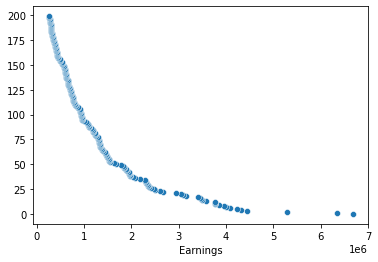

In [43]:
# Check distribution of y
sns.scatterplot(x=earnings['Earnings'], y=earnings.index)

Looking at the plot above, we can infer that the data follows a non linear distribution. Cubist performed really well in this case because it looked at intermediate linear models and took a number k which are k neighbours at the boundaries and smoothen the value based on neighbouring values, so that the jumps that are observed in case M5 model are taken care.